<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [9]:
## Write your code here
# 1. Check missing values
missing_counts = df[['Employment', 'JobSat', 'RemoteWork']].isna().sum()
print("Missing values in critical columns:\n", missing_counts)

# 2. Handle missing values
# Employment: fill with most frequent value
df['Employment'] = df['Employment'].fillna(df['Employment'].mode()[0])

# JobSat: fill with most frequent value
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])

# RemoteWork: fill with most frequent value
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])

# 3. Verify missing values are handled
print("\nMissing values after imputation:\n", df[['Employment', 'JobSat', 'RemoteWork']].isna().sum())


Missing values in critical columns:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64

Missing values after imputation:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


Median Job Satisfaction by Experience Range:
 ExperienceRange
0-5     NaN
5-10    NaN
10-20   NaN
>20     NaN
Name: JobSat_Score, dtype: float64


/tmp/ipykernel_1823/2786005521.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat_Score'].median()


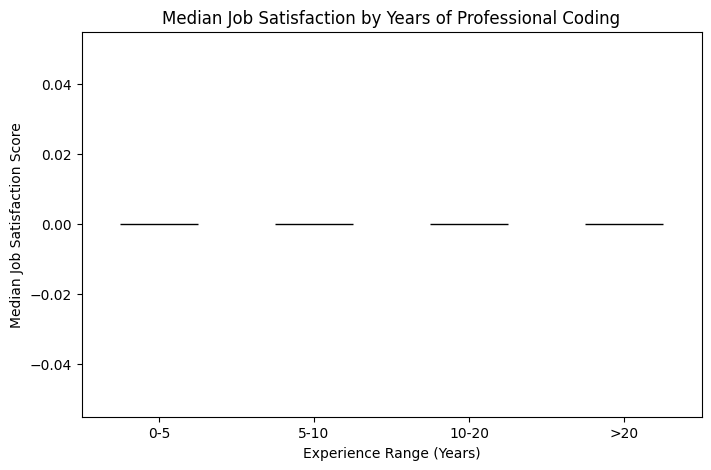

In [12]:
## Write your code here
import numpy as np
import matplotlib.pyplot as plt

# 1. Convert YearsCodePro to numeric, coerce invalid entries to NaN
df['YearsCodePro_Num'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 2. Define experience ranges
bins = [0, 5, 10, 20, np.inf]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro_Num'], bins=bins, labels=labels, right=False)

# 3. Map JobSat to numeric scores
jobsat_mapping = {
    'Very satisfied': 5,
    'Slightly satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly dissatisfied': 2,
    'Very dissatisfied': 1
}

# Handle missing or non-standard values
df['JobSat_Score'] = df['JobSat'].astype(str).str.strip().map(jobsat_mapping)

# 4. Calculate median JobSat score per experience range
median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat_Score'].median()
print("Median Job Satisfaction by Experience Range:\n", median_jobsat_by_experience)

# 5. Visualize the relationship with a bar plot
plt.figure(figsize=(8,5))
median_jobsat_by_experience.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Median Job Satisfaction by Years of Professional Coding')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction Score')
plt.xticks(rotation=0)
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_1823/3876907111.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=jobsat_data, order=[


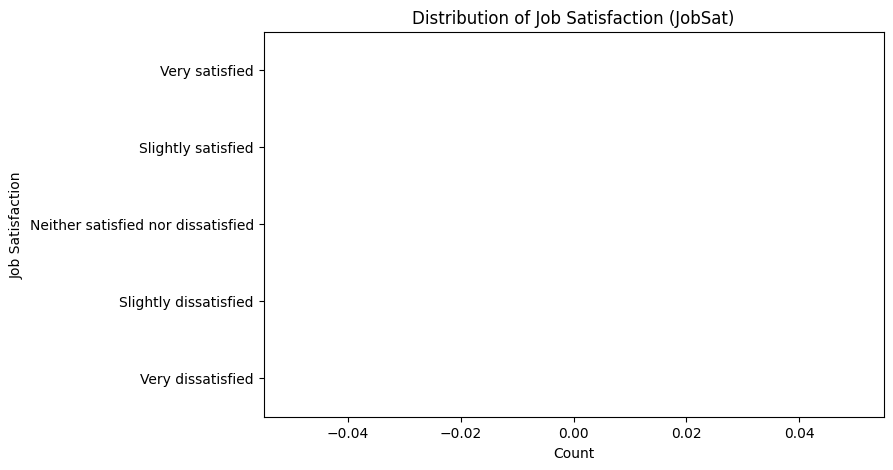

In [13]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Remove missing values for plotting
jobsat_data = df['JobSat'].dropna()

# Create count plot
plt.figure(figsize=(8,5))
sns.countplot(y=jobsat_data, order=[
    'Very satisfied',
    'Slightly satisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly dissatisfied',
    'Very dissatisfied'
], palette='coolwarm')

plt.title('Distribution of Job Satisfaction (JobSat)')
plt.xlabel('Count')
plt.ylabel('Job Satisfaction')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_1823/2249473786.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='RemoteWork', data=df, palette='pastel')


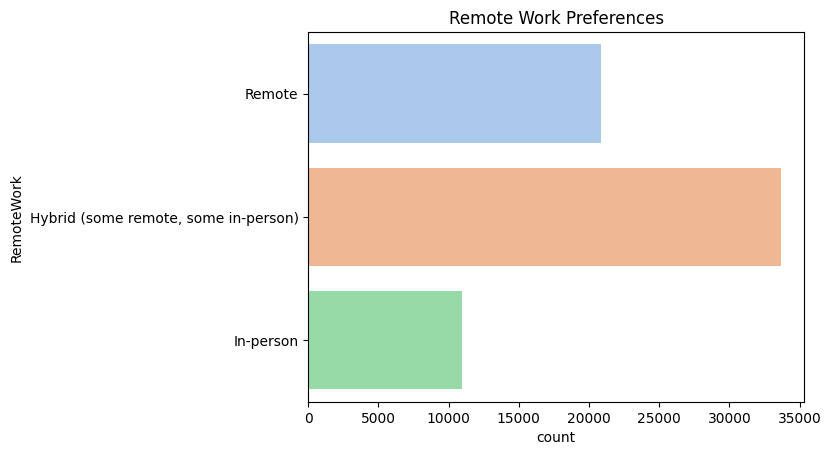

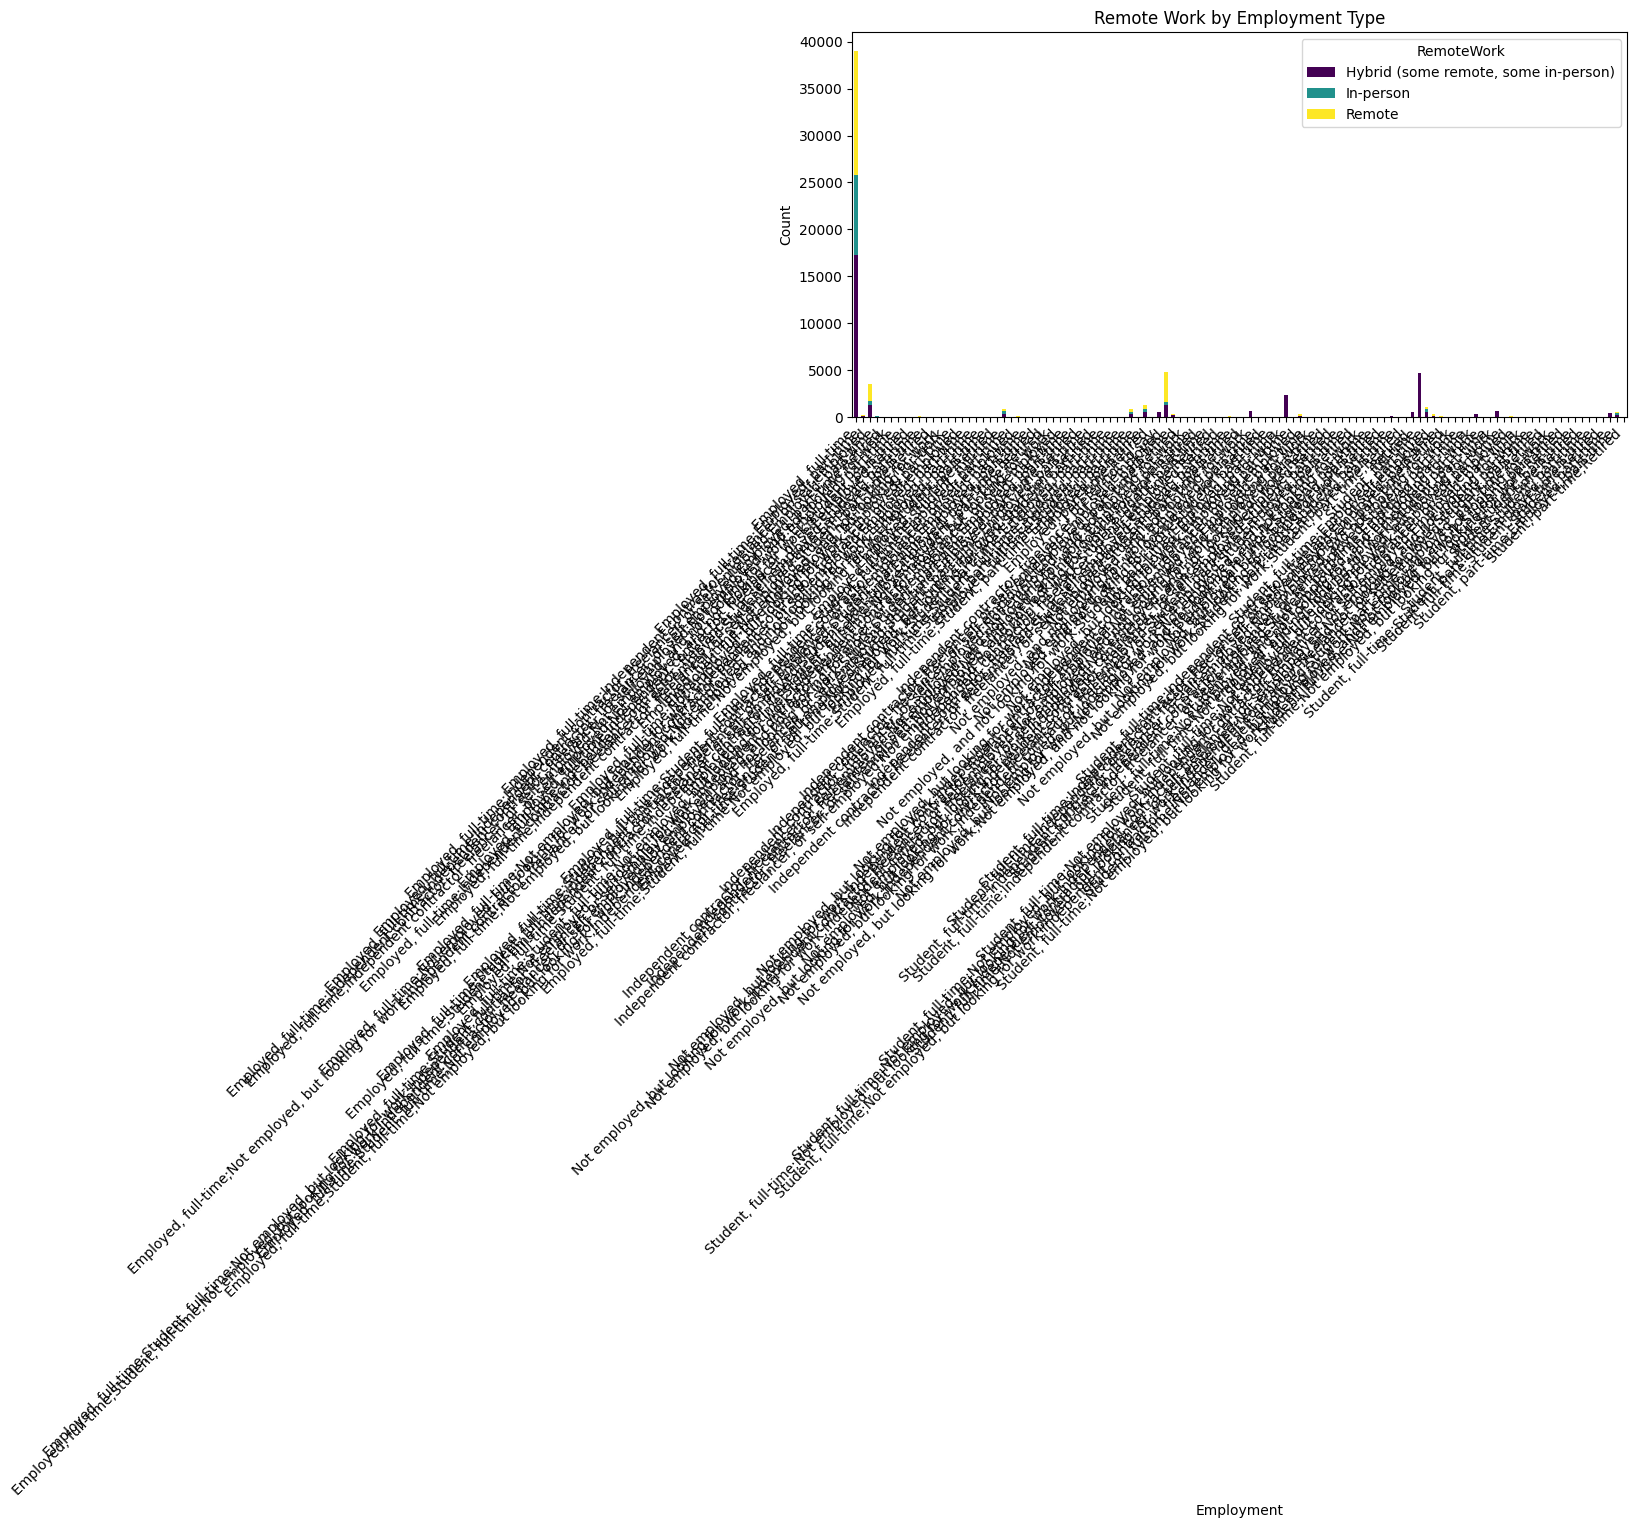

In [14]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of RemoteWork
sns.countplot(y='RemoteWork', data=df, palette='pastel')
plt.title('Remote Work Preferences')
plt.show()

# Cross-tabulate RemoteWork by Employment
remote_by_emp = pd.crosstab(df['Employment'], df['RemoteWork'])
remote_by_emp.plot(kind='bar', stacked=True, figsize=(10,5), colormap='viridis')
plt.title('Remote Work by Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [16]:
# Inspect country values
print(df['Country'].unique())

# Strip whitespace from Country column
df['Country'] = df['Country'].astype(str).str.strip()

# Now filter by country
region_df = df_exp[df_exp['Country'] == 'United States']

# Check if any rows remain
print("Rows for United States:", len(region_df))


['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

In [18]:
# Clean country column by stripping whitespace
df['Country'] = df['Country'].astype(str).str.strip()

# Split multi-language entries into lists
df['Languages'] = df['LanguageHaveWorkedWith'].dropna().str.split(';')

# Explode so each language has its own row
df_exp = df.explode('Languages')

# Pick a valid country that exists in the dataset
print(df['Country'].unique())  # Inspect available countries
country = 'United States'       # Replace if necessary with a valid entry

# Filter by the chosen country
region_df = df_exp[df_exp['Country'] == country]

# Check that rows exist
if len(region_df) == 0:
    print(f"No data found for {country}. Choose a valid country from df['Country'].unique()")
else:
    # Count top languages
    top_langs = region_df['Languages'].value_counts().head(10)
    print("Top languages in", country, ":\n", top_langs)

    # Bar plot
    top_langs.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Top Programming Languages in {country}')
    plt.ylabel('Count')
    plt.xlabel('Language')
    plt.xticks(rotation=45)
    plt.show()


['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

Top languages in United States of America :
 Languages
JavaScript                 6849
Python                     6238
SQL                        5766
HTML/CSS                   5754
Bash/Shell (all shells)    4776
TypeScript                 4173
C#                         3112
Java                       2949
C++                        2607
C                          2225
Name: count, dtype: int64


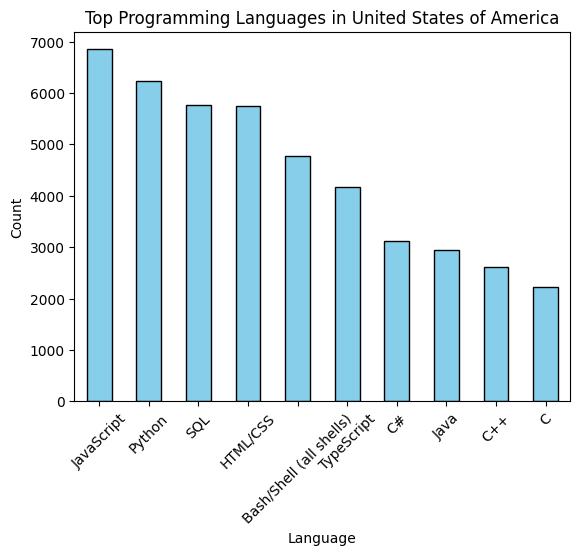

In [23]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Clean Country column
df['Country'] = df['Country'].astype(str).str.strip()

# Split Languages into lists and explode
df['Languages'] = df['LanguageHaveWorkedWith'].dropna().str.split(';')
df_exp = df.explode('Languages')

# Correct country name
country = 'United States of America'

# Filter by country
region_df = df_exp[df_exp['Country'] == country]

if region_df.empty:
    print(f"No data available for {country}.")
else:
    # Count top languages
    top_langs = region_df['Languages'].value_counts().head(10)
    print("Top languages in", country, ":\n", top_langs)

    # Plot
    top_langs.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Top Programming Languages in {country}')
    plt.ylabel('Count')
    plt.xlabel('Language')
    plt.xticks(rotation=45)
    plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


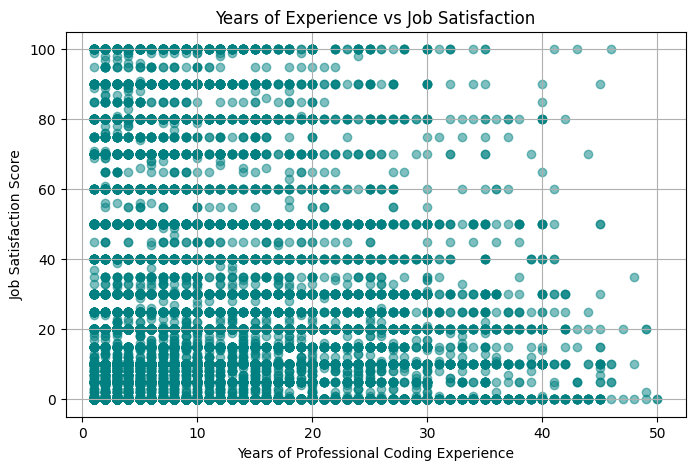

In [24]:
## Write your code here
import matplotlib.pyplot as plt

# Convert YearsCodePro and JobSatPoints_1 to numeric, coercing errors to NaN
df['YearsCodePro_Num'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1_Num'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in either column
scatter_df = df.dropna(subset=['YearsCodePro_Num', 'JobSatPoints_1_Num'])

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(scatter_df['YearsCodePro_Num'], scatter_df['JobSatPoints_1_Num'], alpha=0.5, color='teal')
plt.title('Years of Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   
nan                                                                2516   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                        

/tmp/ipykernel_1823/2538514264.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


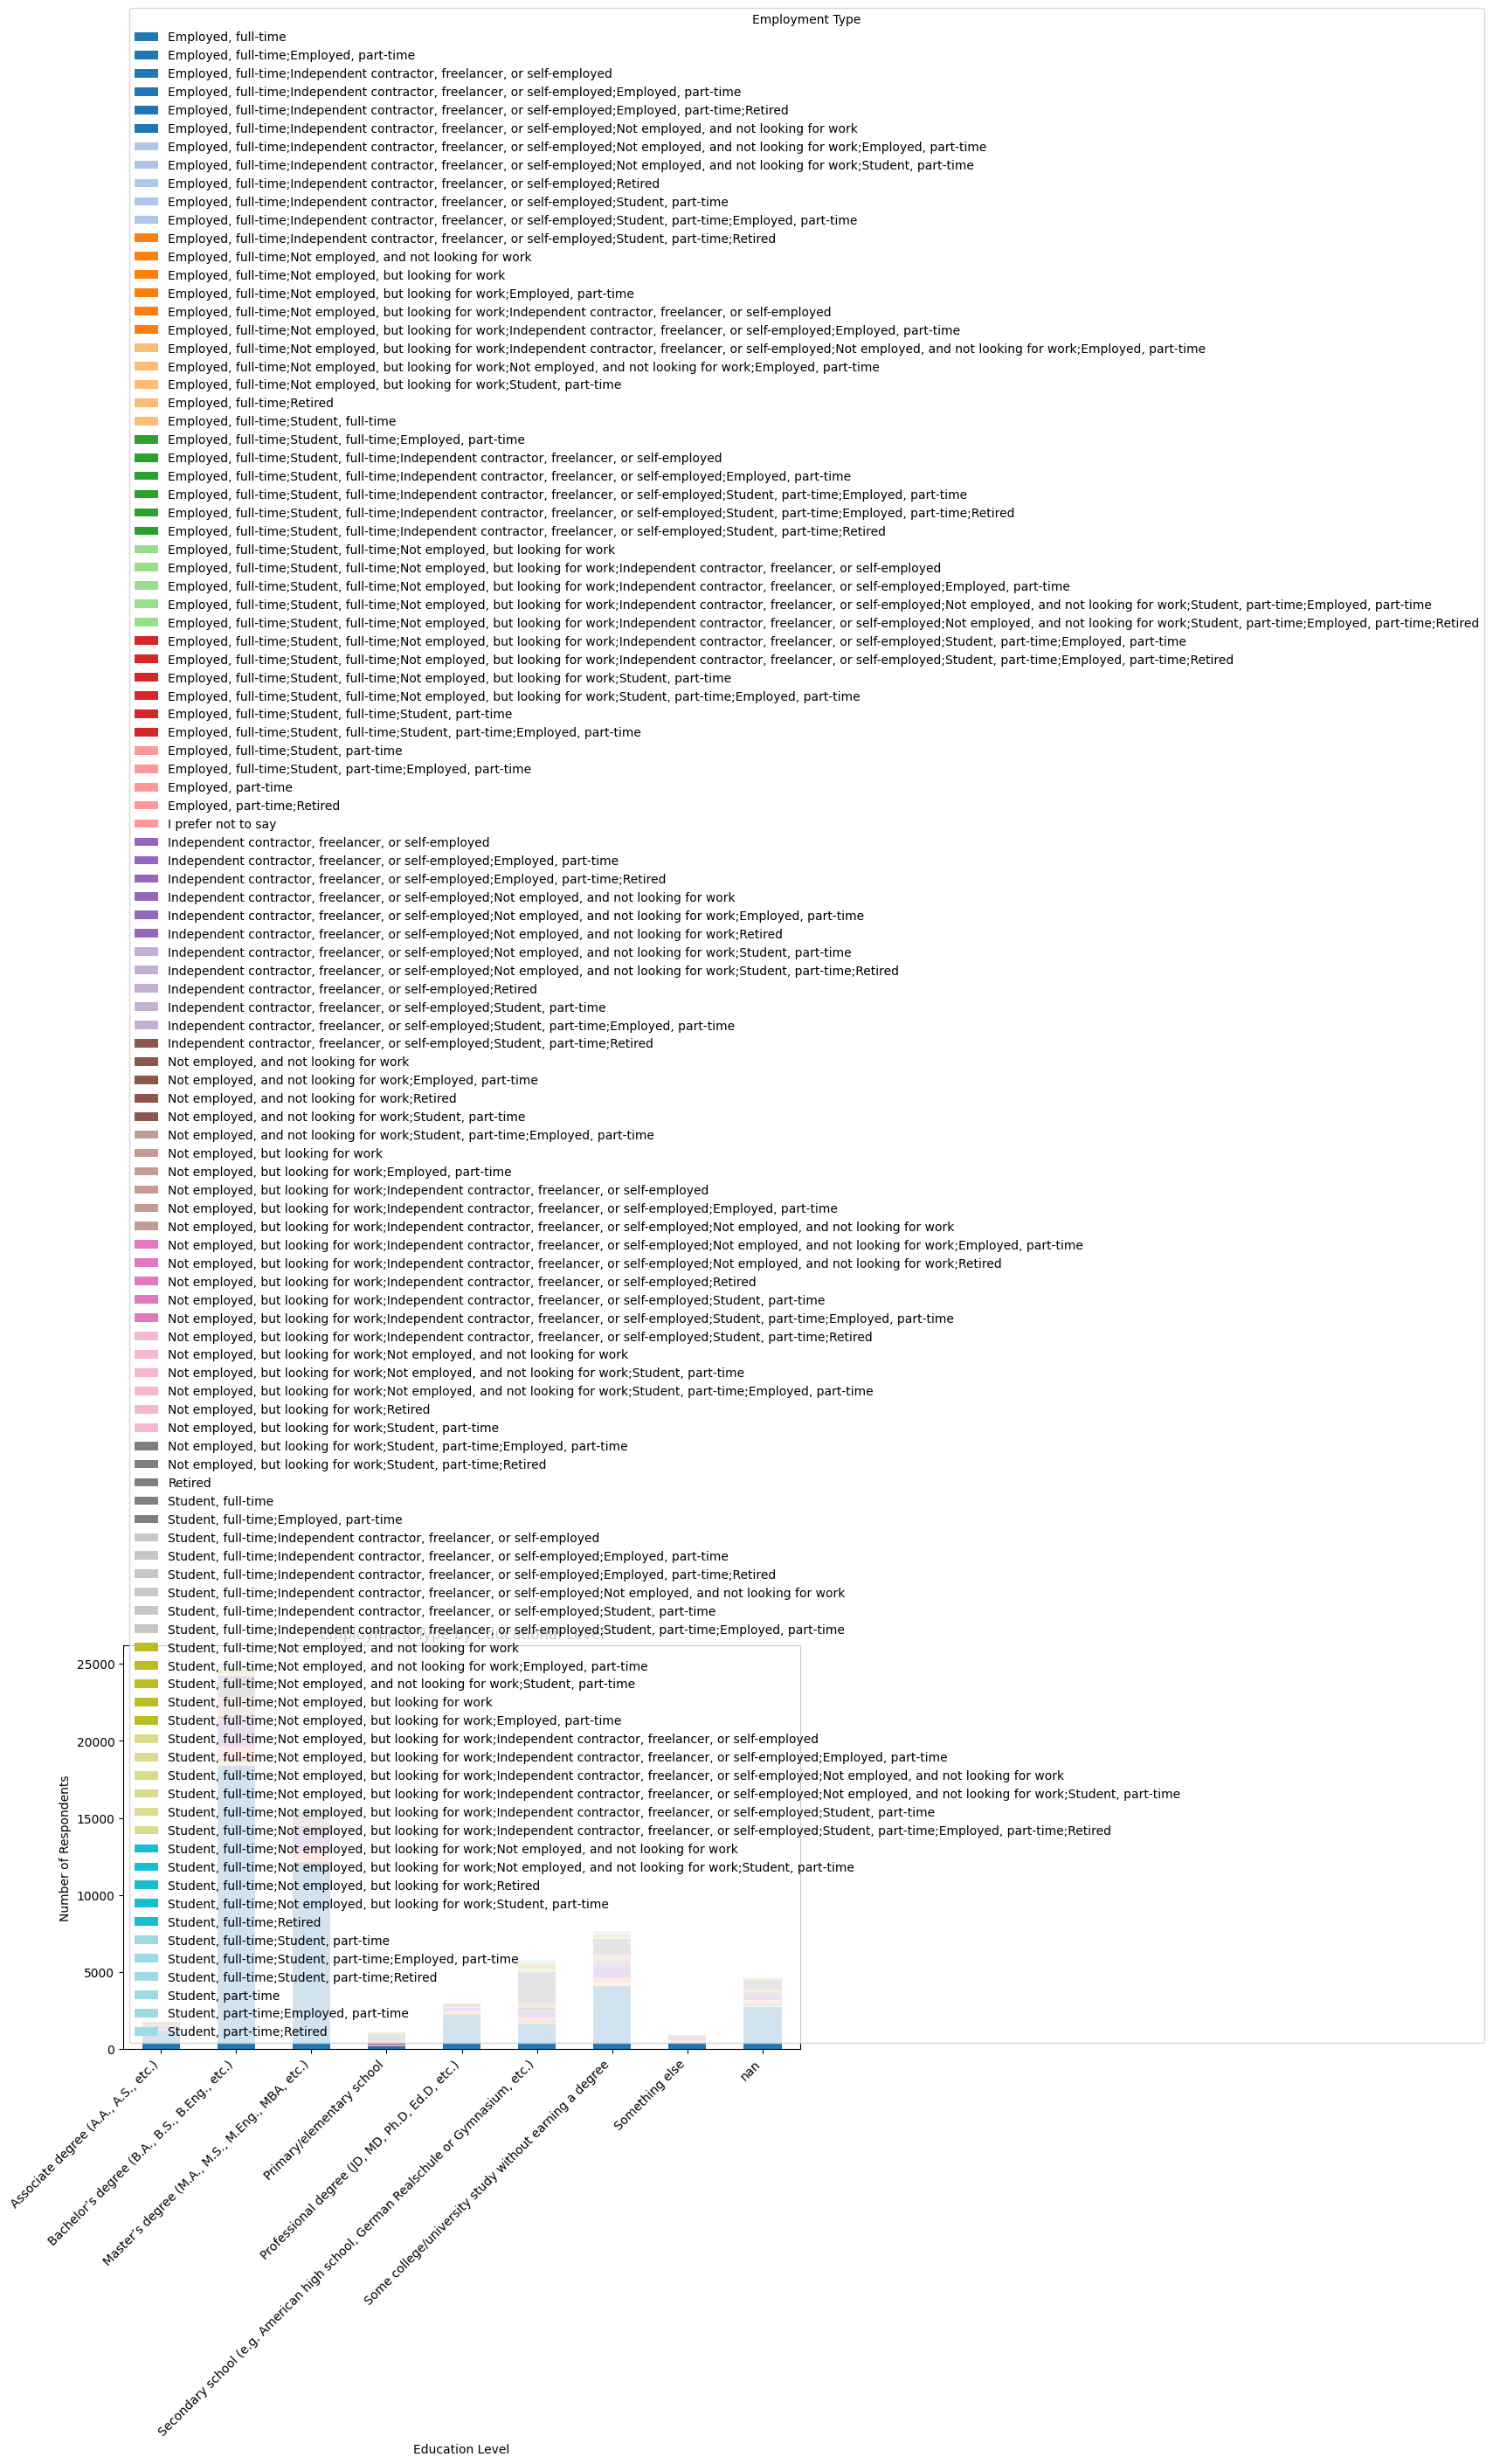

In [25]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Clean columns by stripping whitespace
df['EdLevel'] = df['EdLevel'].astype(str).str.strip()
df['Employment'] = df['Employment'].astype(str).str.strip()

# Cross-tabulation
edu_emp_ct = pd.crosstab(df['EdLevel'], df['Employment'])
print(edu_emp_ct)

# Plot a stacked bar chart
edu_emp_ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Employment Type by Educational Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type')
plt.tight_layout()
plt.show()


In [26]:
df.info()
df.head()
df.describe(include='all')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 120 entries, ResponseId to JobSatPoints_1_Num
dtypes: category(1), float64(16), int64(1), object(102)
memory usage: 59.5+ MB


ResponseId                0
MainBranch                0
Age                       0
Employment                0
RemoteWork                0
                      ...  
ExperienceRange       16733
JobSat_Score          65437
JobSat_Clean              0
Languages              5692
JobSatPoints_1_Num    36113
Length: 120, dtype: int64

In [27]:
df.drop_duplicates(inplace=True)


TypeError: unhashable type: 'list'

#### Step 10: Save the Cleaned and Analyzed Dataset


In [29]:
import pandas as pd
import numpy as np

# Load dataset
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(data_url)

# -------------------------------
# 1. Standardize column names
# -------------------------------
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^0-9a-zA-Z_]', '', regex=True)

# -------------------------------
# 2. Remove duplicates
# -------------------------------
df.drop_duplicates(inplace=True)

# -------------------------------
# 3. Handle missing values
# -------------------------------
for col in ['employment', 'remotework', 'jobsat', 'edlevel']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

for col in ['convertedcompyearly', 'yearscodepro']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].median(), inplace=True)

# -------------------------------
# 4. Clean categorical data
# -------------------------------
for col in ['country', 'employment', 'edlevel', 'remotework']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

edu_map = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor's degree",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's degree",
    "Some college/university study without earning a degree": "Some college",
    "Primary/elementary school": "Primary school",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school"
}
df['edlevel'] = df['edlevel'].replace(edu_map)

# -------------------------------
# 5. Convert multi-value columns
# -------------------------------
if 'languagehaveworkedwith' in df.columns:
    df['languages'] = df['languagehaveworkedwith'].dropna().str.split(';')
    df_exp = df.explode('languages')
else:
    df_exp = df.copy()

# -------------------------------
# 6. Normalize numeric columns manually
# -------------------------------
df['log_comp'] = np.log1p(df['convertedcompyearly'])

# Manual Min-Max scaling
df['comp_scaled'] = (df['convertedcompyearly'] - df['convertedcompyearly'].min()) / \
                    (df['convertedcompyearly'].max() - df['convertedcompyearly'].min())

# -------------------------------
# 7. Feature Engineering
# -------------------------------
bins = [0, 5, 10, 20, 50]
labels = ['0-5', '5-10', '10-20', '>20']
df['experience_level'] = pd.cut(df['yearscodepro'], bins=bins, labels=labels)

# -------------------------------
# 8. Save cleaned dataset
# -------------------------------
df.to_csv('cleaned_stackoverflow_survey.csv', index=False)

print("Dataset cleaned and saved as 'cleaned_stackoverflow_survey.csv'")


/tmp/ipykernel_1823/1008919756.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_1823/1008919756.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Dataset cleaned and saved as 'cleaned_stackoverflow_survey.csv'


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
